In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import comet_ml
from comet_ml import Experiment

In [3]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CometLogger

In [4]:
from manifoldembedder import *

In [5]:
train_file_list = []
val_file_list = []
test_file_list = []
predict_file_list = []

for file in os.listdir('/nobackup/users/sangeon/datasets/mnist'):
    if "train" in file:
        train_file_list.append(os.path.join('/nobackup/users/sangeon/datasets/mnist',file))
    elif "val" in file:
        val_file_list.append(os.path.join('/nobackup/users/sangeon/datasets/mnist',file))
    elif "predict" in file:
        predict_file_list.append(os.path.join('/nobackup/users/sangeon/datasets/mnist',file))
    elif "test" in file:
        test_file_list.append(os.path.join('/nobackup/users/sangeon/datasets/mnist',file))

In [6]:
file_dict = {'train':train_file_list,
             'val':val_file_list,
             'test':test_file_list,
             'predict':predict_file_list}

In [7]:
mnistpair_dm = MNISTPairDataModule(file_dict,10000)

In [8]:
model = ManifoldEmbedder("MNIST",2,"CNN", 1e-4, [2, [1000,400,20]])


In [9]:
#model = model.load_from_checkpoint('/home/sangeon/ToyJetGenerator/training/mnist_checkpoints/MNIST-CNN2-mseloss-checkpoint-epoch=05-val_loss=0.34.ckpt')


In [10]:
experiment = Experiment(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder_MNIST",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sangeonpark/metricembedder-mnist/96a3b1f601ec4caba4919a22bdeb3625



In [11]:
comet_logger = CometLogger(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder_MNIST",
)

CometLogger will be initialized in online mode


In [12]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=3, verbose=False)

In [13]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="/home/sangeon/ToyJetGenerator/training/mnist_checkpoints",
    filename="MNIST-CNN-PaperFinal-mseloss-checkpoint-{epoch:02d}-{val_loss:.2f}",
    save_top_k=4,
    mode="min",
)

In [14]:
trainer = Trainer(gpus=1,callbacks=[PrintCallbacks(),early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Starting to init trainer!
Trainer is init now


In [15]:
lr_finder = trainer.tuner.lr_find(model, mnistpair_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


euclidean:  tensor([0.0019, 0.0018], device='cuda:0')
torch.Size([10000])
euclidean:  tensor([0.0019, 0.0015], device='cuda:0')
torch.Size([10000])


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

euclidean:  tensor([0.1221, 0.6543], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([1.6493, 0.5308], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([1.2351, 0.4762], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([0.2639, 0.8502], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([0.2381, 0.8826], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([1.1299, 1.1092], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([0.6151, 0.5763], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([0.7446, 0.8505], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([1.2735, 1.7207], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:  tensor([0.2195, 2.1312], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([10000])
euclidean:

Restoring states from the checkpoint path at /home/sangeon/ToyJetGenerator/training/lr_find_temp_model_c224abb8-aa37-4bd7-b1e3-2713ff35e3be.ckpt


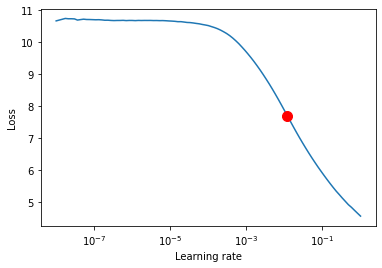

In [16]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [17]:
new_lr = lr_finder.suggestion()

new_lr

model.hparams.learning_rate = new_lr

model.learning_rate = new_lr

model.learning_rate

0.012022644346174132

In [ ]:
trainer.fit(model, mnistpair_dm)

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder-mnist/2a46b46c031746feb7612710b59efb4a
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [20] : (0.4520939290523529, 10.6588134765625)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.03 MB)
COMET IN

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [8]:
model = ManifoldEmbedder.load_from_checkpoint("../training/mnist_checkpoints/MNIST-CNN-PaperFinal-mseloss-checkpoint-epoch=02-val_loss=0.23.ckpt")

In [ ]:
model.eval(

In [16]:
a = trainer.predict(model, mnistpair_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder-mnist/96a3b1f601ec4caba4919a22bdeb3625
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Not all initial data has been logged for experiment 96a3b1f601ec4caba4919a22bdeb3625, call Experiment.end() to ensure that all data to have been logged
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET 

Predicting: 0it [00:00, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:172: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder-mnist/4ddcf8f2f7484e9f8dcd8b5d7708f41f
COMET INFO:   Parameters:
COMET INFO:     backbone_type : CNN
COMET INFO:     data_npair    : 2
COMET INFO:     data_type     : MNIST
COMET INFO:     learning_rate : 0.008317637711026709
COMET INFO:     modelparams   : [2, [1000, 400, 20]]
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadat

In [17]:
label = np.array([])
embedding = np.empty((0,2))
for batch in a:
    #print(batch[0].shape)
    embedding = np.vstack((embedding, batch[0].cpu().numpy()))
    label = np.concatenate([label, batch[1].cpu().numpy()])
    #print(batch[0], batch[1])

In [18]:
embedding[label==7]

array([[-0.00570983, -0.06451325],
       [-0.01357392, -0.1134758 ],
       [-0.01618119, -0.12855712],
       ...,
       [-0.03089095, -0.03032497],
       [-0.05002509, -0.04207465],
       [-0.0130016 , -0.05806831]])

In [19]:
embedding[label==1]

array([[-0.01155591, -0.02640705],
       [-0.0148389 , -0.02839431],
       [-0.00095712, -0.04941153],
       ...,
       [-0.05554016,  0.00482544],
       [-0.00678905, -0.04030134],
       [-0.02006302, -0.02821852]])

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 18})

In [21]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt


In [22]:
from scipy import stats


In [23]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [24]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [25]:
m1.shape

(2000,)

In [26]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])


In [27]:
values.shape

(2, 2000)

In [28]:
from scipy import stats

def plot_kde(ax, digit,color):
    xmin = embedding[label==digit][:,0].min()
    xmax = embedding[label==digit][:,0].max()
    ymin = embedding[label==digit][:,1].min()
    ymax = embedding[label==digit][:,1].max()
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    kernel = stats.gaussian_kde(embedding[label==digit].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
    ax.contour(X,Y,Z,levels=[800,1500,2000,5000],colors=color)
    return None


In [29]:
kernel5 = stats.gaussian_kde(embedding[label==5].T)

In [30]:
Z = np.reshape(kernel5(positions).T, X.shape)

In [31]:
Z.max()

97.05846401112935

In [32]:
Z.shape

(100, 100)

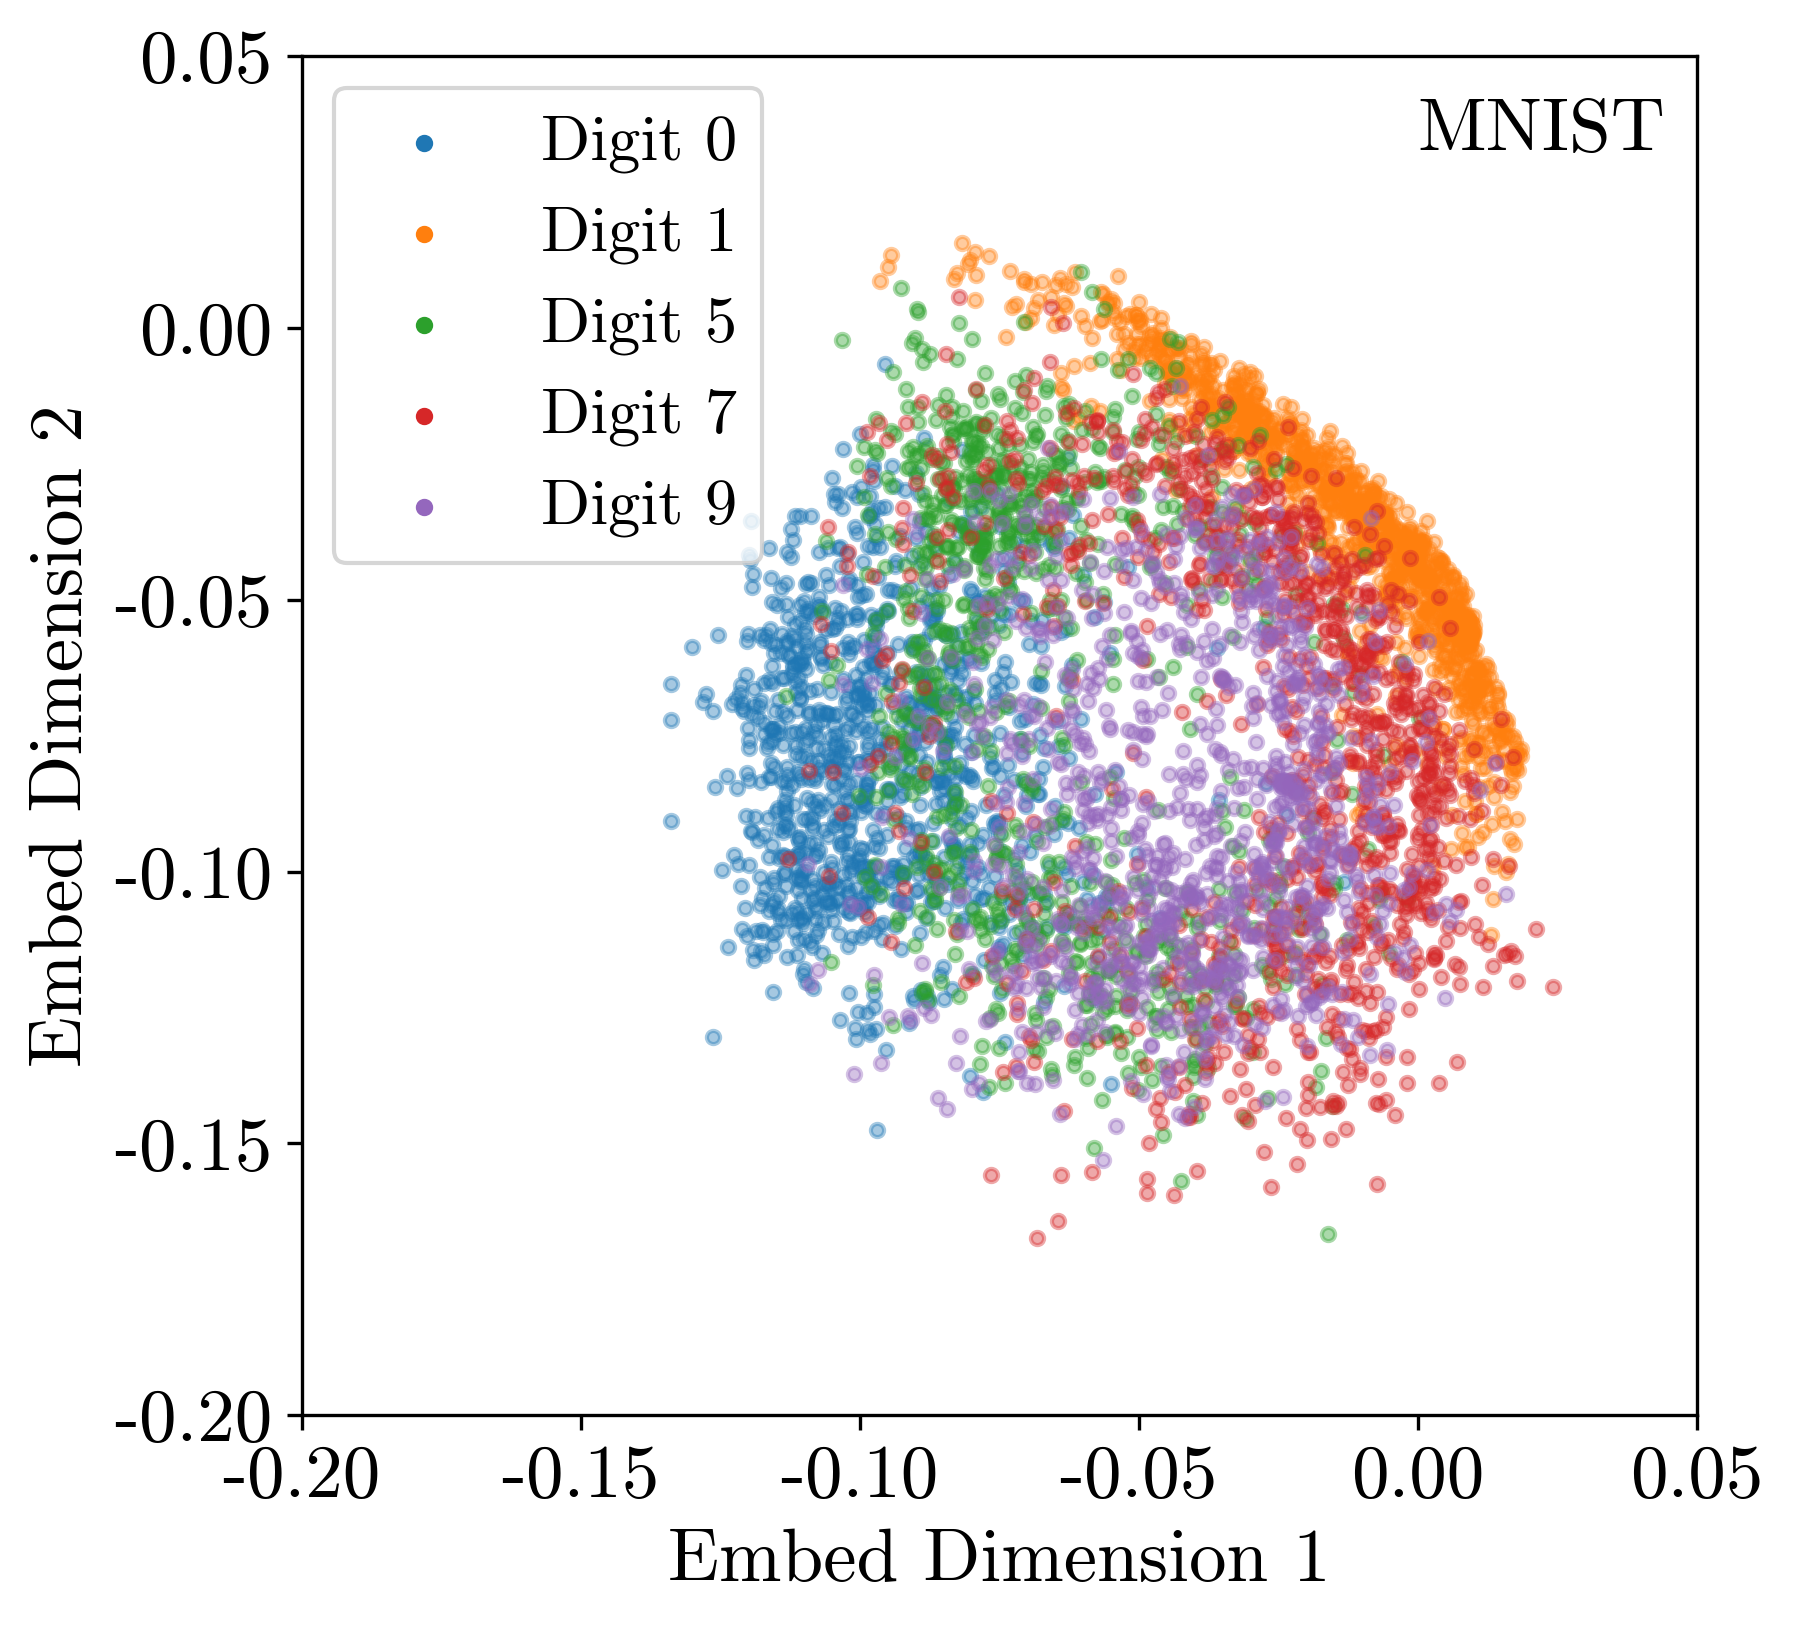

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(embedding[label==0][:,0],embedding[label==0][:,1],s=10,color='C0',alpha=0.4,label='Digit 0')
ax.scatter(embedding[label==1][:,0],embedding[label==1][:,1],s=10,color='C1',alpha=0.4,label='Digit 1')
#ax.scatter(embedding[label==2][:100,0],embedding[label==2][:100,1],s=200,alpha=0.1,label='2')
#ax.scatter(embedding[label==3][:100,0],embedding[label==3][:100,1],s=200,alpha=0.1,label='3')
#ax.scatter(embedding[label==4][:100,0],embedding[label==4][:100,1],s=200,alpha=0.1,label='4')
ax.scatter(embedding[label==5][:,0],embedding[label==5][:,1],s=10,color='C2',alpha=0.4,label='Digit 5')
#ax.scatter(embedding[label==6][:,0],embedding[label==6][:,1],s=10,color='C3',alpha=0.4,label='Digit 6')
ax.scatter(embedding[label==7][:,0],embedding[label==7][:,1],s=10,color='C3',alpha=0.4,label='Digit 7')
#ax.scatter(embedding[label==7][:100,0],embedding[label==7][:100,1],s=200,alpha=0.1,label='7')
#ax.scatter(embedding[label==8][:100,0],embedding[label==8][:100,1],s=200,alpha=0.1,label='8')
ax.scatter(embedding[label==9][:,0],embedding[label==9][:,1],s=10,color='C4',alpha=0.4,label='Digit 9')
#ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])

ax.text(0.8, 0.93, 'MNIST', transform=ax.transAxes)

#print(ax.collections[1].get_color()=='C0')

ax.set_xlabel('Embed Dimension 1')
ax.set_ylabel('Embed Dimension 2')
ax.set_xlim([-0.2,0.05])
ax.set_ylim([-0.2,0.05])
leg = ax.legend(fontsize=15.5)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
#fig.savefig(f'../figures/paper/embedding_MNIST_01579_paper_final.png')
#fig.savefig(f'../figures/paper/embedding_MNIST_01579_paper_final.pdf')

fig.savefig(f'../figures/paper_JHEP/MNIST_Embedding_ScatterPlot.png',bbox_inches='tight')
fig.savefig(f'../figures/paper_JHEP/MNIST_Embedding_ScatterPlot.pdf',bbox_inches='tight')

In [34]:
from sklearn.neighbors import KernelDensity
from scipy import interpolate

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""
    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[-0.2:0.05:xbins, 
                      -0.2:0.05:ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [35]:
def plot_KDE_cdf_contour(ax, whichlabel, cdfval, color):
    xx, yy, zz = kde2D(embedding[label==whichlabel][:,0], embedding[label==whichlabel][:,1], .005, kernel='gaussian')
    hist = zz/zz.sum()
    n = 1000
    t = np.linspace(0, hist.max(), n)
    integral = ((hist >= t[:, None, None]) * hist).sum(axis=(1,2))
    f = interpolate.interp1d(integral, t)
    t_contours = f(np.array(cdfval))
    
    #ax.imshow(hist.T, origin='lower', extent=[-0.1, 0.4, -0.05, 0.35], cmap="gray",aspect='auto')
    CS = ax.contour(hist.T, t_contours, extent=[-0.2,0.05, -0.2,0.05],colors=color, alpha=0.8)
    
    #fig.set_size_inches(8, 8)
    return CS
    

In [36]:
namelist = ['Digit 0','Digit 1','Digit 5','Digit 7','Digit 9']


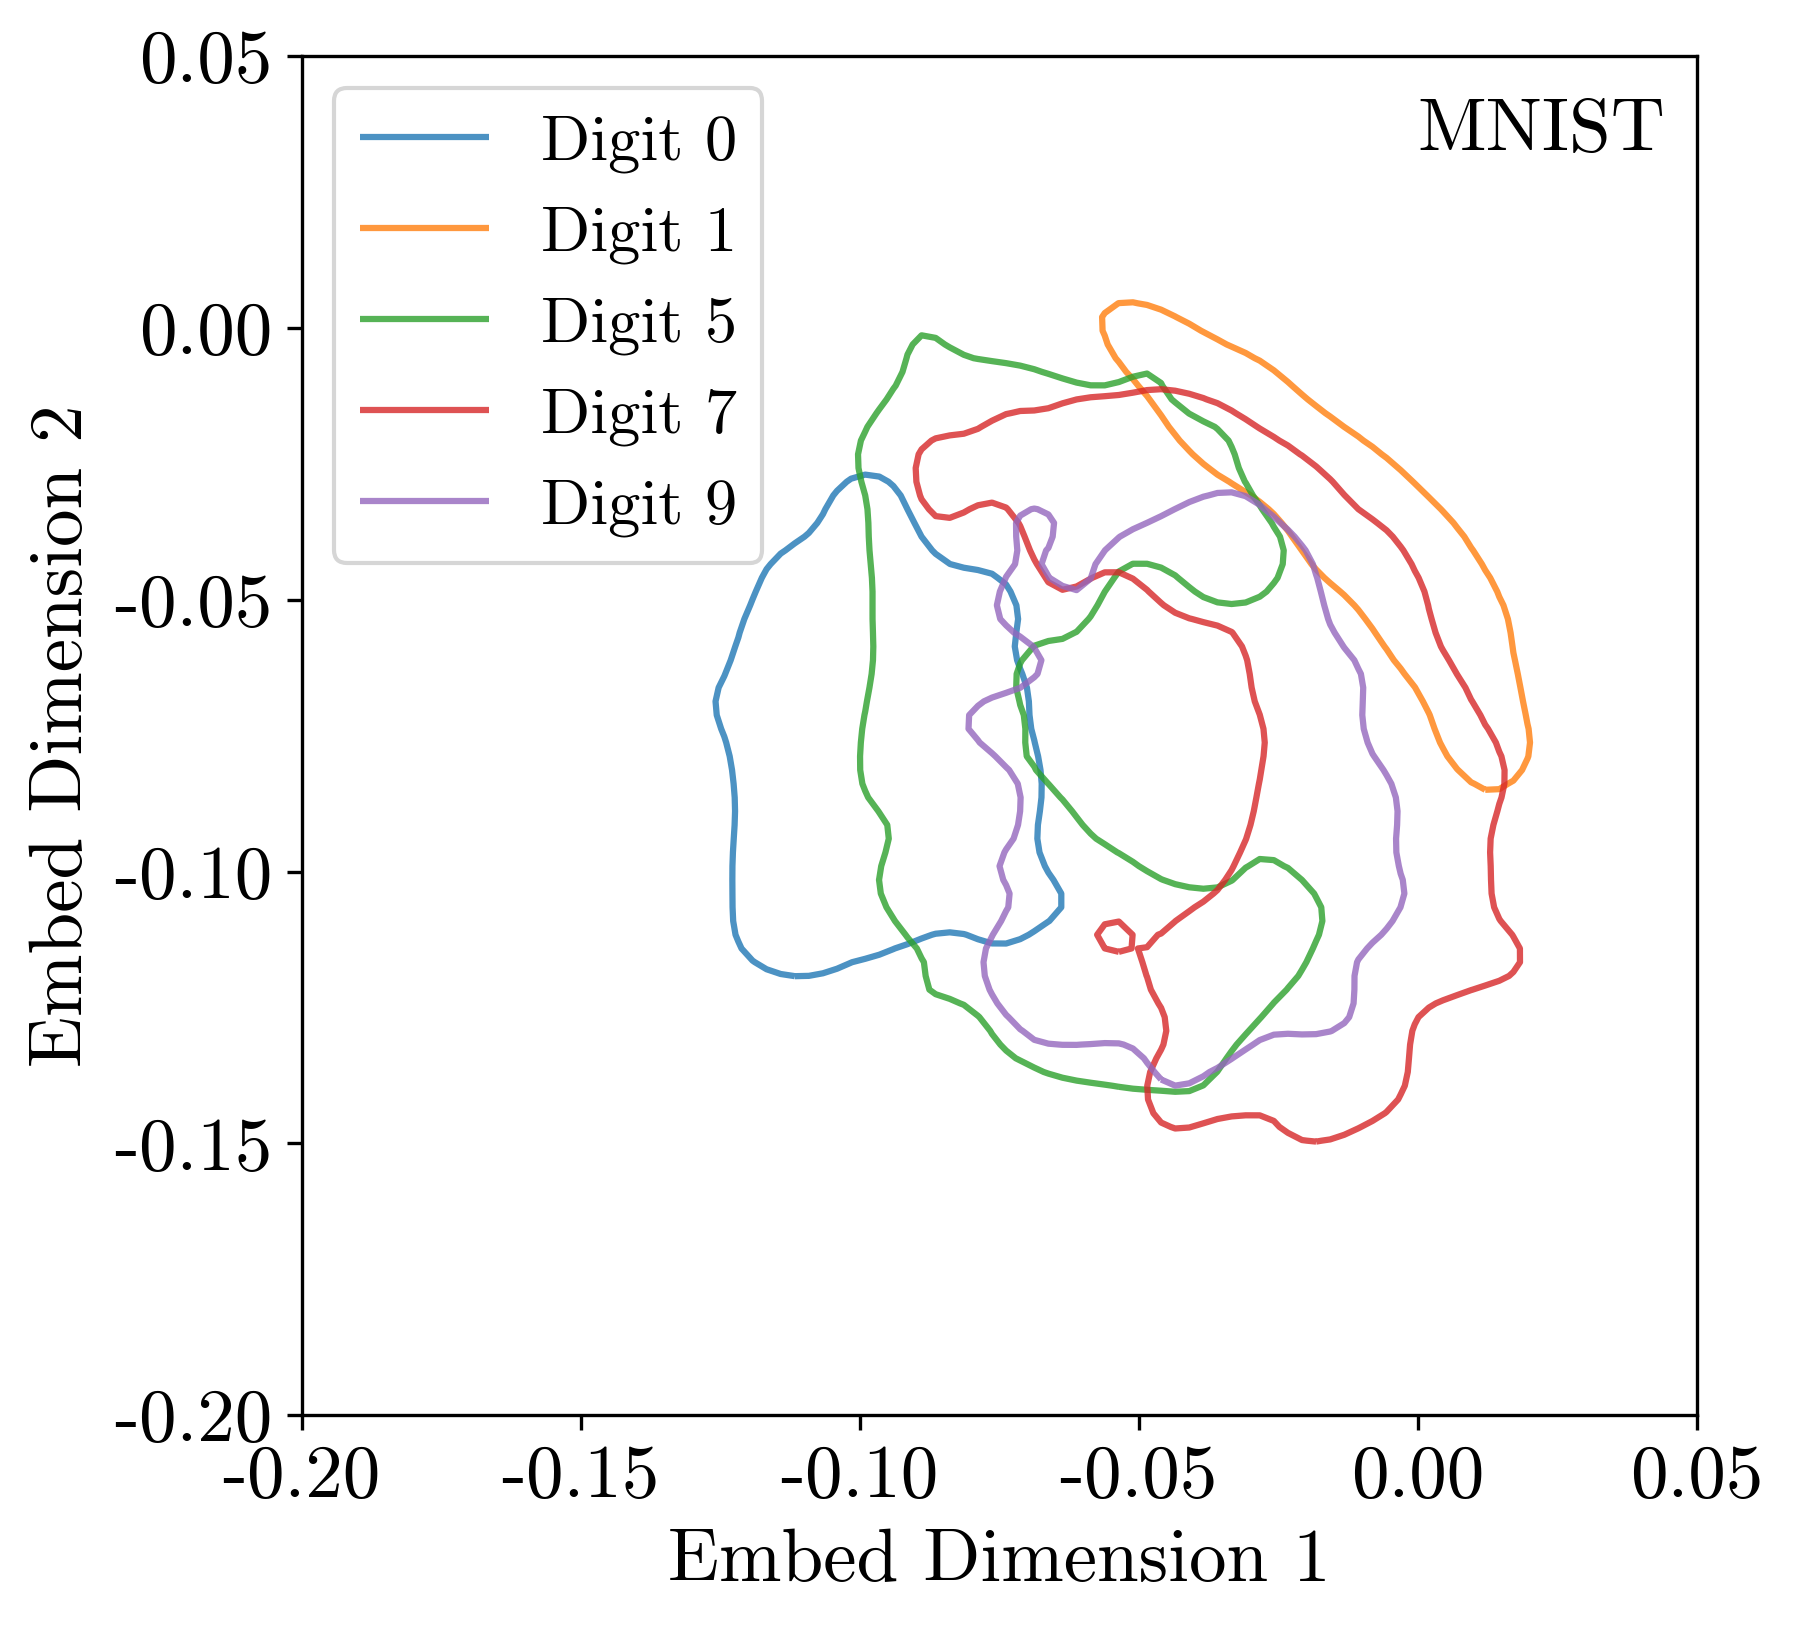

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
lines = []
CS = plot_KDE_cdf_contour(ax, 0,[0.8], f'C0')
lines.append(CS.collections[0])
CS = plot_KDE_cdf_contour(ax, 1,[0.8], f'C1')
lines.append(CS.collections[0])
CS = plot_KDE_cdf_contour(ax, 5,[0.8], f'C2')
lines.append(CS.collections[0])
CS = plot_KDE_cdf_contour(ax, 7,[0.8], f'C3')
lines.append(CS.collections[0])
CS = plot_KDE_cdf_contour(ax, 9,[0.8], f'C4')
lines.append(CS.collections[0])

ax.text(0.8, 0.93, 'MNIST', transform=ax.transAxes)

ax.set_xlabel('Embed Dimension 1')
ax.set_ylabel('Embed Dimension 2')
ax.set_xlim([-0.2,0.05])
ax.set_ylim([-0.2,0.05])
ax.legend(lines, namelist,loc='upper left',fontsize=15.5)
#ax.set_title('MNIST Embedding')    
fig.savefig(f'../figures/paper_JHEP/MNIST_Embedding_ContourPlot.png',bbox_inches='tight')
fig.savefig(f'../figures/paper_JHEP/MNIST_Embedding_ContourPlot.pdf',bbox_inches='tight')

None
None
None
None
None


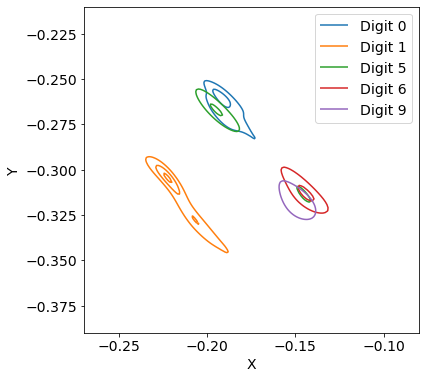

In [190]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
####ax.scatter(embedding[label==0][:50,0],embedding[label==0][:50,1],s=200,alpha=0.1,label='0')
####ax.scatter(embedding[label==1][:50,0],embedding[label==1][:50,1],s=200,alpha=0.1,label='1')
#ax.scatter(embedding[label==2][:100,0],embedding[label==2][:100,1],s=200,alpha=0.1,label='2')
#ax.scatter(embedding[label==3][:100,0],embedding[label==3][:100,1],s=200,alpha=0.1,label='3')
#ax.scatter(embedding[label==4][:100,0],embedding[label==4][:100,1],s=200,alpha=0.1,label='4')
####ax.scatter(embedding[label==5][:50,0],embedding[label==5][:50,1],s=200,alpha=0.1,label='5')
####ax.scatter(embedding[label==6][:50,0],embedding[label==6][:50,1],s=200,alpha=0.1,label='6')
#ax.scatter(embedding[label==7][:100,0],embedding[label==7][:100,1],s=200,alpha=0.1,label='7')
#ax.scatter(embedding[label==8][:100,0],embedding[label==8][:100,1],s=200,alpha=0.1,label='8')
####ax.scatter(embedding[label==9][:50,0],embedding[label==9][:50,1],s=200,alpha=0.1,label='9')
#ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
plot_kde(ax, 0,'C0')
plot_kde(ax, 1,'C1')
#plot_kde(ax, 2,'C2')
#plot_kde(ax, 3,'C3')
#plot_kde(ax, 4,'C4')
plot_kde(ax, 5,'C2')
plot_kde(ax, 6,'C3')
#plot_kde(ax, 7,'red')
#plot_kde(ax, 8,'red')
plot_kde(ax, 9,'C4')
print(ax.collections[0].set_label("Digit 0"))
print(ax.collections[6].set_label("Digit 1"))
print(ax.collections[11].set_label("Digit 5"))
print(ax.collections[15].set_label("Digit 6"))
print(ax.collections[16].set_label("Digit 9"))

#print(ax.collections[1].get_color()=='C0')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.27,-0.08])
ax.set_ylim([-0.39,-.21])
ax.legend()
fig.savefig(f'../figures/paper/embedding_MNIST_KDE_01569.png')
fig.savefig(f'../figures/paper/embedding_MNIST_KDE_01569.pdf')

In [ ]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)